# <b>A. <span style='color:#0B2F9F'><code>DATA TYPE</code></span></b>

Data type dalam BigQuery adalah cara untuk mendefinisikan jenis data yang akan disimpan dalam tabel. Setiap kolom dalam tabel memiliki tipe data tertentu, yang menentukan apa yang dapat disimpan di kolom tersebut dan bagaimana data tersebut dapat diproses. Memahami tipe data ini penting untuk desain skema yang efisien dan untuk memastikan bahwa kueri dapat dijalankan dengan optimal.

<br>
<img src="https://hackolade.com/help/lib/BigQuery%20data%20types%20table.png" width="40%">

docs : <i><a href="https://cloud.google.com/bigquery/docs/reference/standard-sql/data-types">https://cloud.google.com/bigquery/docs/reference/standard-sql/data-types</a></i>

# <b>B. <span style='color:#0B2F9F'><code>Operasi Tipe Data Numerik</code></span></b>

Dalam SQL, tipe data numerik digunakan untuk menyimpan nilai angka dan dapat dikelompokkan menjadi beberapa jenis sesuai peruntukannya (INT, FLOAT, NUMERIC, dll). Selain itu pada tipe data Numerik juga dapat dilakukan operasi matematis diantaranya :
<ol>
    <li>Operasi Aritmatika</li>
    <li>Fungsi Matematis</li>
    <li>Agregasi</li>
</ol>

<i>Note : Untuk materi agregasi akan diletakkan secara terpisah dari modul ini</i>

## <b>B.1. <span style='color:#0B2F9F'><code>Operasi Aritmatika</code></span></b>
SQL mendukung operasi dasar aritmatika seperti penjumlahan, pengurangan, perkalian, pembagian dan modulo.

<img src="https://mazamanbd.wordpress.com/wp-content/uploads/2014/09/dd.jpg"><br><br>

Untuk dapat menerapkannya pada sebuah tabel gunakan contoh format berikut

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/SQL%20-%20OperasiAritmatika.png" width="50%">

<i>docs : <a href="https://cloud.google.com/bigquery/docs/reference/standard-sql/operators">https://cloud.google.com/bigquery/docs/reference/standard-sql/operators</a></i>

#### <i><b><span style='color:#55679C'>Quest</span> : Tower untuk memancarkan sinyal milik perusahaan telekomunikasi hanya dapat menjangkau maksimum radius 10 km. Hitung luas area jangkauan tower tersebut jika diasumsikan jangkauannya berbentuk lingkaran! (Aproksimasi nilai &pi; = 22/7)</b></i>

In [ ]:
SELECT (22/7)*10*10 AS luas_area_jangkauan

314.2857142857143

#### <i><b><span style='color:#55679C'>Quest</span> : Tampilkan kolom customer_id, total_revenue dan total_revenue_after_tax pada tabel telco_services, dimana kolom total_revenue_after_tax merupakan total_revenue dikurangi pajak 10% yang harus dibayarkan! Urutkan berdasarkan total_revenue dari yang terbesar juga</b></i>

In [ ]:
SELECT
  customer_id,
  total_revenue,
  ROUND(total_revenue*0.9,2) AS total_revenue_after_tax
FROM telco_churn.telco_services
ORDER BY total_revenue DESC

customer_id,total_revenue,total_revenue_after_tax
0164-APGRB,11979.34,10781.41
8263-QMNTJ,11868.34,10681.51
5451-YHYPW,11795.78,10616.2
3810-DVDQQ,11688.9,10520.01
7569-NMZYQ,11634.53,10471.08
3963-RYFNS,11596.99,10437.29
9351-HXDMR,11564.37,10407.93
5914-XRFQB,11529.54,10376.59
0619-OLYUR,11514.81,10363.33
3508-CFVZL,11501.82,10351.64


Notes: Gunakan "." sebagai koma dalam menuliskan numerik
**Fokus** pada: [total_revenue dikali 0.9]

#### <i><b><span style='color:#55679C'>Quest</span></b></i>
Perusahaan ingin menerapkan discount tertentu dengan syarat berikut :
<ul>
    <li>Jika <code>tenure_in_months</code> dibawah satu tahun, maka beri discount 2% pada biaya bulanan pelanggan</li>
    <li>Jika <code>tenure_in_months</code> diantara 1 - 3 tahun, maka beri discount 5% pada biaya bulanan pelanggan</li>
    <li>Jika <code>tenure_in_months</code> diatas 3 tahun, maka beri discount 10% pada biaya bulanan pelanggan</li>
</ul><br>
Tampilkan customer_id, tenure_in_months, monthly_charge, discount (potongan charge bukan presentasenya) dan monthly_charge_after_disc!

In [ ]:
SELECT
  customer_id,
  tenure_in_months,
  monthly_charge,
  CASE
    WHEN tenure_in_months < 12 THEN ROUND((monthly_charge * 0.02),2)
    WHEN tenure_in_months <= 12 OR tenure_in_months < 36 THEN ROUND((monthly_charge * 0.05),2)
    WHEN tenure_in_months > 36 THEN ROUND((monthly_charge * 0.1),2)
    END AS discount,
  CASE
    WHEN tenure_in_months < 12 THEN ROUND((monthly_charge - (monthly_charge* 0.02)),2)
    WHEN tenure_in_months <= 12 OR tenure_in_months < 36 THEN ROUND((monthly_charge - (monthly_charge * 0.05)),2)
    WHEN tenure_in_months > 36 THEN ROUND((monthly_charge - (monthly_charge * 0.1)),2)
    END AS monthly_charge_after_disc
  FROM telco_churn.telco_services

customer_id,tenure_in_months,monthly_charge,discount,monthly_charge_after_disc
8779-QRDMV,1,39.65,0.79,38.86
7495-OOKFY,8,80.65,1.61,79.04
1658-BYGOY,18,95.45,4.77,90.68
4598-XLKNJ,25,98.5,4.93,93.58
4846-WHAFZ,37,76.5,7.65,68.85
4412-YLTKF,27,78.05,3.9,74.15
0390-DCFDQ,1,70.45,1.41,69.04
3445-HXXGF,58,45.3,4.53,40.77
2656-FMOKZ,15,74.45,3.72,70.73
2070-FNEXE,7,76.45,1.53,74.92


Dalam menggunakan syntax **CASE WHEN**, kita juga bisa menggabungkannya dalam perhitungan. Sebagai contoh: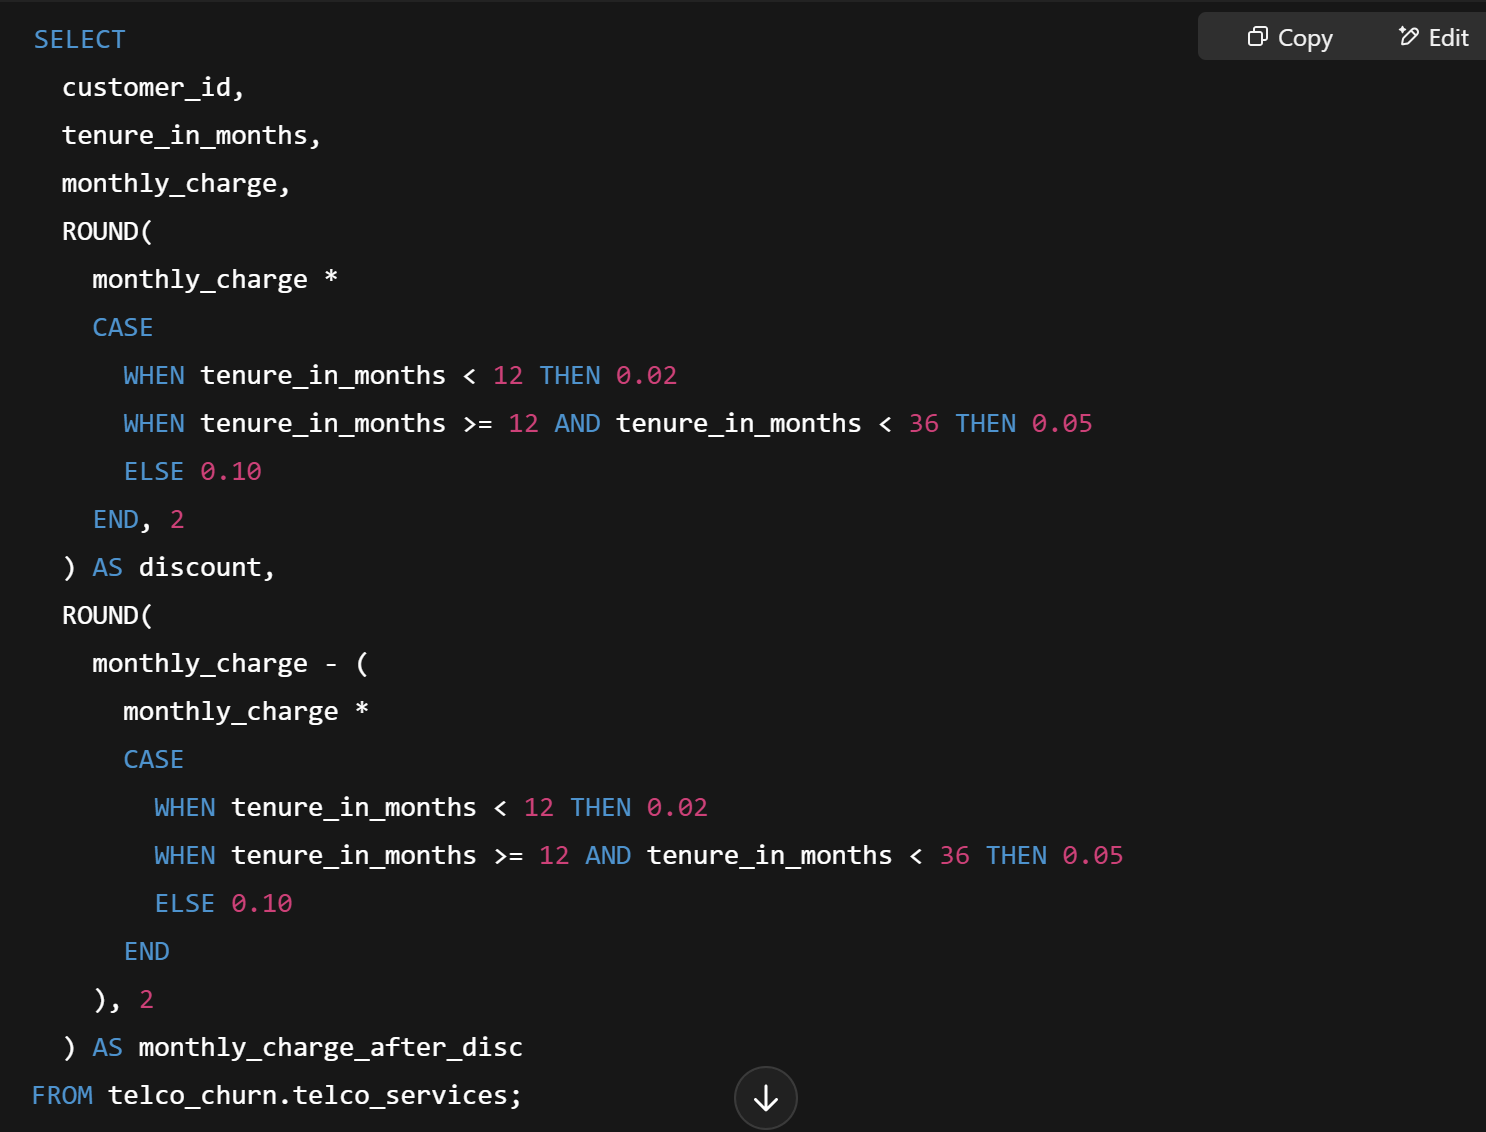

#### <i><b><span style='color:#55679C'>Quest</span> : Customer Loyalty Score (CLS) adalah metrik yang digunakan untuk mengukur tingkat kesetiaan pelanggan terhadap suatu brand atau perusahaan. Metrik ini dapat membantu perusahaan memahami seberapa kuat hubungan mereka dengan pelanggan.</b></i><br>
Customer Loyalty Score dapat dirumuskan sebagai :
\begin{equation}
\text{Customer Loyalty Score (CLS)} = \text{Customer Satisfaction Score} \times \frac{\text{CLTV}}{100}
\end{equation}

Pada tabel `customer_status`, tampilkan kolom customer_id, cltv, satisfaction_score, cls dan status!

In [ ]:
SSELECT
  customer_id,
  cltv,
  satisfaction_score,
  (satisfaction_score*(cltv/100)) AS CLS,
  status
FROM telco_churn.customer_status

customer_id,cltv,satisfaction_score,cls,status
2800-VEQXM,3319,3,99.57,Joined
6865-JZNKO,2725,4,109.0,Stayed
8332-OSJDW,3277,4,131.08,Stayed
9362-MWODR,5056,3,151.68,Stayed
0811-GSDTP,3540,5,177.0,Stayed
4213-HKBJO,3378,4,135.12,Stayed
2135-RXIHG,2600,1,26.0,Churned
5451-YHYPW,6205,3,186.15,Stayed
5918-VUKWP,5358,3,160.74,Stayed
0322-CHQRU,3478,1,34.78,Churned


## <b>B.2. <span style='color:#0B2F9F'><code>Fungsi Matematis</code></span></b>
SQL juga mendukung fungsi matematis dasar yang disajikan pada tabel berikut :

<table border="1">
    <thead>
        <tr>
            <th>Fungsi</th>
            <th>Deskripsi</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>ABS()</code></td>
            <td>Mengambil nilai absolut</td>
        </tr>
        <tr>
            <td><code>ROUND()</code></td>
            <td>Membulatkan angka</td>
        </tr>
        <tr>
            <td><code>CEIL()</code></td>
            <td>Membulatkan ke atas</td>
        </tr>
        <tr>
            <td><code>FLOOR()</code></td>
            <td>Membulatkan ke bawah</td>
        </tr>
        <tr>
            <td><code>POW()</code></td>
            <td>Menghitung pangkat</td>
        </tr>
    </tbody>
</table>

Untuk dapat menerapkannya pada sebuah tabel gunakan contoh format berikut

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/SQL-FungsiMatematis.png" width="50%">

<i>docs : <a href="https://cloud.google.com/bigquery/docs/reference/standard-sql/mathematical_functions">https://cloud.google.com/bigquery/docs/reference/standard-sql/mathematical_functions</a></i>

#### <i><b><span style='color:#55679C'>Quest</span> : </b></i><br>
Customer Loyalty Score dapat dirumuskan sebagai :
\begin{equation}
\text{Customer Loyalty Score (CLS)} = \text{Customer Satisfaction Score} \times \frac{\text{CLTV}}{100}
\end{equation}

Pada tabel `customer_status`, tampilkan kolom customer_id, cltv, satisfaction_score, cls dan status. Namun bulatkan cls dengan pembulatan tanpa adanya angka dibelakang koma (ROUND(0)) dan tampilkan hanya yang statusnya churn lalu urutkan berdasarkan cls terbesar hingga terkecil!

In [ ]:
SELECT
  customer_id,
  cltv,
  satisfaction_score,
  ROUND(satisfaction_score * (cltv/100), 0) AS customer_loyalty_score,
  status
FROM telco_churn.customer_status
WHERE status = 'Churned'
ORDER BY customer_loyalty_score DESC

customer_id,cltv,satisfaction_score,cls,status
1043-YCUTE,6484,3,195,Churned
4143-HHPMK,6402,3,192,Churned
8634-CILSZ,6350,3,190,Churned
3313-QKNKB,6304,3,189,Churned
2533-QVMSK,6295,3,189,Churned
9090-SGQXL,6284,3,189,Churned
0607-DAAHE,6265,3,188,Churned
0877-SDMBN,6117,3,184,Churned
2886-KEFUM,6144,3,184,Churned
4791-QRGMF,6098,3,183,Churned


# <b>C. <span style='color:#0B2F9F'><code>Operasi Tipe Data Date</code></span></b>

Dalam SQL, tipe data date digunakan untuk menyimpan atau mengoperasikan data tanggal. Tipe data tanggal dapat dilakukan operasi berikut, diantaranya :
<ol>
    <li>Menampilkan Tanggal & Waktu saat ini</li>
    <li>Menambahkan atau Mengurangi Tanggal</li>
    <li>Mendapatkan Bagian Tanggal</li>
    <li>Menghitung Selisih Tanggal</li>
</ol>

<br><b>NOTE</b><br><br>
Hal-hal yang perlu diperhatikan dalam penggunaan operasi `date` adalah :
<ul>
    <li>Format tanggal standar SQL adalah 'YYYY-MM-DD' atau tahun - bulan - tanggal, contoh : 2024-10-14 menunjukan tanggal 14 October 2024</li>
    <li>Mengakses tanggal pada SQL perlu menggunakan tanda apit petik satu, contoh : '2024-10-14'</li>
    <li>Pastikan nilai atau kolom tanggal tipe datanya adalah DATE atau TIMESTAMP, jika tidak maka bisa dikonversi menjadi <code>DATE(tanggal)</code> atau <code>TIMESTAMP(tanggal)</code></li>
</ul>

<i>docs : <a href="https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions">https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions</a></i>

## <b>C.1. <span style='color:#0B2F9F'><code>Menampilkan Tanggal & Waktu Saat Ini</code></span></b>

Untuk menampilkan tanggal dan waktu saat ini dapat menggunakan fungsi berikut
<table border="1">
    <thead>
        <tr>
            <th>Fungsi</th>
            <th>Deskripsi</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>CURRENT_DATE()</code></td>
            <td>Mendapatkan Tanggal Hari ini Saja</td>
        </tr>
        <tr>
            <td><code>CURRENT_TIMESTAMP()</code></td>
            <td>Mendapatkan Tanggal & Waktu Hari ini (UTC)</td>
        </tr>
    </tbody>
</table>

UTC atau (Universal Time Coordinated) adalah waktu dasar yang tidak terpengaruh oleh zona waktu dan <i>daylight saving time</i>. UTC digunakan sebagai acuan untuk menghitung waktu di berbagai zona waktu di seluruh dunia (standar Greenwich Mean Time (London)). Selengkapnya baca <a href="https://internasional.kompas.com/read/2021/03/04/192042570/sejarah-penetapan-zona-waktu-di-dunia-hingga-usulan-penghapusannya?page=all">disini</a>.

#### <i><b><span style='color:#55679C'>Quest</span> : Tampilkan semua kolom pada tabel customer_demography dan tambahkan kolom data_collection_time sebagai kolom metadata waktu pengambilan data</b></i><br>

In [ ]:
SELECT
  *,
  CURRENT_DATETIME('Asia/Jakarta') AS data_collection_time
FROM telco_churn.customer_demography

customer_id,gender,age,senior_citizen,married,number_of_dependents,data_collection_time
8779-QRDMV,Male,78,Yes,No,0,2024-10-13 11:37:32.583807
7495-OOKFY,Female,74,Yes,Yes,1,2024-10-13 11:37:32.583807
1658-BYGOY,Male,71,Yes,No,3,2024-10-13 11:37:32.583807
4598-XLKNJ,Female,78,Yes,Yes,1,2024-10-13 11:37:32.583807
4846-WHAFZ,Female,80,Yes,Yes,1,2024-10-13 11:37:32.583807
4412-YLTKF,Female,72,Yes,No,1,2024-10-13 11:37:32.583807
0390-DCFDQ,Female,76,Yes,Yes,2,2024-10-13 11:37:32.583807
3445-HXXGF,Male,66,Yes,Yes,0,2024-10-13 11:37:32.583807
2656-FMOKZ,Female,70,Yes,No,2,2024-10-13 11:37:32.583807
2070-FNEXE,Female,77,Yes,No,2,2024-10-13 11:37:32.583807


Penggunaan Syntax **CURRENT_DATETIME** mengacu kepada daerah dari Timezone (TZ), seperti: Greenwich, London, Africa/Lagos dsb

## <b>C.2. <span style='color:#0B2F9F'><code>Menambahkan atau Mengurangi Tanggal</code></span></b>

<table border="1">
    <thead>
        <tr>
            <th>Fungsi</th>
            <th>Deskripsi</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>DATE_ADD(tanggal, INTERVAL jumlah_penambahan satuan_waktu)</code></td>
            <td>Menambahkan Tanggal pada Interval Tertentu</td>
        </tr>
        <tr>
            <td><code>DATE_SUB(tanggal, INTERVAL jumlah_penambahan satuan_waktu)</code></td>
            <td>Mengurangi Tanggal pada Interval Tertentu</td>
        </tr>
    </tbody>
</table>

Sebagai contoh misalkan hari ini tanggal 14 Oktober 2024. Ingin diperoleh tanggal tepat 3 bulan yang lalu maka dapat digunakan sintaks `DATE_SUB(DATE('2024-10-14'), INTERVAL 3 MONTH)` maka akan diperoleh tanggal 14 Juli 2024.

#### <i><b><span style='color:#55679C'>Quest</span> : Misalkan tanggal sekarang adalah 1 Januari 2025 dan tenure_in_months adalah kolom pada table telco_services maka setiap customer_id tentukan perkiraan tanggal berapa tiap customer mulai berlangganan!</b></i><br>

In [ ]:
SELECT
  customer_id,
  DATE_SUB(DATE('2025-01-01'), INTERVAL tenure_in_months MONTH) AS join_date,
  tenure_in_months
FROM telco_churn.telco_services

customer_id,join_date,tenure_in_months
4433-JCGCG,2020-03-01,46
8263-OKETD,2022-05-01,20
2533-TIBIX,2022-10-01,15
8917-SZTTJ,2019-01-01,60
5743-KHMNA,2018-02-01,71
5056-FIMPT,2020-06-01,43
4922-CVPDX,2021-11-01,26
9931-KGHOA,2020-03-01,46
4121-AGSIN,2019-03-01,58
1077-HUUJM,2023-06-01,7


## <b>C.3. <span style='color:#0B2F9F'><code>Mendapatkan Bagian pada Tanggal</code></span></b>

Mengambil bagian tertentu dari tipe data tanggal, waktu, atau timestamp terkadang sangat perlu dilakukan untuk analisa data. Jika ingin didapatkan elemen tertentu, seperti tahun, bulan, hari, atau jam, dari nilai tanggal atau waktu gunakan fungsi berikut<br><br>

<code>EXTRACT(bagian FROM tanggal)</code>
<br><br>

Bagian yang bisa diambil pada tanggal diantaranya adalah
<table border="1">
    <thead>
        <tr>
            <th>Bagian</th>
            <th>Deskripsi</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>YEAR</code></td>
            <td>Mendapatkan Tahun pada Tanggal</td>
        </tr>
        <tr>
            <td><code>MONTH</code></td>
            <td>Mendapatkan Bulan pada Tanggal</td>
        </tr>
        <tr>
            <td><code>DAY</code></td>
            <td>Mendapatkan Hari (1-31) pada Tanggal</td>
        </tr>
        <tr>
            <td><code>WEEK</code></td>
            <td>Mendapatkan Minggu ke- pada Tanggal</td>
        </tr>
         <tr>
            <td><code>QUARTER</code></td>
            <td>Mendapatkan Kuartal pada Tanggal</td>
        </tr>
        <tr>
            <td><code>HOUR</code></td>
            <td>Mendapatkan Jam pada Waktu</td>
        </tr>
        <tr>
            <td><code>MINUTE</code></td>
            <td>Mendapatkan Menit pada Waktu</td>
        </tr>
        <tr>
            <td><code>SECOND</code></td>
            <td>Mendapatkan Detik pada Waktu</td>
        </tr>
    </tbody>
</table>
<br>

Namun jika menginginkan bagian yang lebih detail seperti Nama Bulan atau Nama Hari pada tanggal tertentu atau menampilkan format tanggal sesuai dengan keinginan dapat menggunakan sintaks `FORMAT_DATE(format_element, tanggal)`. <br><br>

<table border="1">
    <thead>
        <tr>
            <th>Sintaks</th>
            <th>Deskripsi</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>FORMAT_DATE('%A', tanggal)</code></td>
            <td>Mendapatkan Nama Hari pada Tanggal Tertentu</td>
        </tr>
        <tr>
            <td><code>FORMAT_DATE('%B', tanggal)</code></td>
            <td>Mendapatkan Nama Bulan pada Tanggal Tertentu</td>
        </tr>
    </tbody>
</table>

Detail format_element dapat diakses dilaman <a href="https://cloud.google.com/bigquery/docs/reference/standard-sql/format-elements#format_elements_date_time"> berikut</a>.





#### <i><b><span style='color:#55679C'>Quest</span> : Misalkan tanggal sekarang adalah 1 Januari 2025 dan tenure_in_months adalah kolom pada table telco_services maka setiap customer_id tentukan perkiraan bulan (dengan format nama bulan) & tahun berapa tiap customer mulai berlangganan!</b></i><br>

In [ ]:
SELECT
  customer_id,
  FORMAT_DATE('%B %Y', DATE_SUB(DATE('2025-01-01'), INTERVAL tenure_in_months MONTH)) AS join_month_year,
  tenure_in_months
FROM telco_churn.telco_services

customer_id,join_month_year,tenure_in_months
5656-JAMLX,November 2018,62
9782-LGXMC,December 2019,49
0016-QLJIS,August 2018,65
6284-KMNUF,May 2019,56
2041-JIJCI,August 2023,5
3462-BJQQA,July 2023,6
8065-YKXKD,March 2023,10
5382-TEMLV,April 2020,45
6481-ESCNL,August 2021,29
0744-GKNGE,September 2018,64


---
Data Source : <i>https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=samples-telco-customer-churn</i>

---

<br>
<a href="https://www.linkedin.com/in/kennynathane/"><img src="https://img.shields.io/badge/-© 2025 Kenny Nathane-417DAC?style=for-the-badge&logoColor=white"/></a>